## ARIMA PREDICTION MODEL
#### SUBMITTED BY MEGHA AGGERWAL(22BSP0929)

### Here are the steps to implement multiplicative time series forecasting using SARIMA in Python:

#### 1. Preprocess the Data: Ensure that your time series data is properly preprocessed. This includes handling missing values, ensuring a uniform time interval, and removing any trend or seasonality. You may also need to log-transform your data if you believe that the variance of the series increases with its mean.

#### 2.Differencing: If your data still exhibits trend or seasonality after preprocessing, apply differencing to make it stationary (i.e., constant mean and variance). You may need to experiment with different levels of differencing (d) to achieve stationarity.

#### 3.Seasonal Decomposition: Perform seasonal decomposition to separate the time series into trend, seasonal, and residual components. You can use libraries like statsmodels or seasonal_decompose from statsmodels.tsa for this purpose.

#### 4.Model Selection: Based on the decomposed components and the stationary time series, select an appropriate SARIMA model with multiplicative seasonality. The model order should include the seasonal order (P, D, Q, s), where P and Q are the seasonal AR and MA orders, D is the seasonal differencing order, and s is the seasonality period.

#### 5.Fit the SARIMA Model: Use the selected SARIMA model order to fit the model to the differenced and deseasonalized time series.

#### 6.Forecasting: Once the model is fitted, you can use it to make multiplicative forecasts for future time points.

In [2]:
import pandas as pd
csv_file_path = 'CCE.csv'
df = pd.read_csv(csv_file_path)
print(df)


         Date  time  Stock Price(INR)  dy(t)
0    8/1/2020     1              6.01    NaN
1    9/1/2020     2              6.42   0.41
2   10/1/2020     3              6.00  -0.42
3   11/1/2020     4              6.30   0.30
4   12/1/2020     5              7.13   0.83
5    1/1/2021     6              7.07  -0.06
6    2/1/2021     7              7.50   0.43
7    3/1/2021     8              7.91   0.41
8    4/1/2021     9              8.18   0.27
9    5/1/2021    10              8.15  -0.03
10   6/1/2021    11              8.67   0.52
11   7/1/2021    12              8.79   0.12
12   8/1/2021    13              7.93  -0.86
13   9/1/2021    14              8.34   0.41
14  10/1/2021    15              8.20  -0.14
15  11/1/2021    16              8.99   0.79
16  12/1/2021    17              9.02   0.03
17   1/1/2022    18              9.13   0.11
18   2/1/2022    19              9.43   0.30
19   3/1/2022    20              9.23  -0.20
20   4/1/2022    21              9.87   0.64
21   5/1/2

### We load the stock price data from 'cce.csv'.
Check for stationarity using the Augmented Dickey-Fuller test.
Calculate and plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to determine the AR and MA orders.

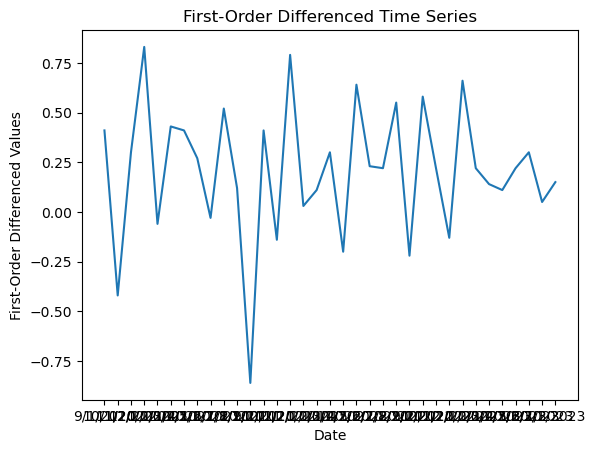

In [3]:
import pandas as pd
import matplotlib.pyplot as plt  # Import Matplotlib and pyplot

# Load your data (replace 'data.csv' with your dataset)
df = pd.read_csv('CCE.csv')

# Perform first-order differencing
df['diff_1'] = df['Stock Price(INR)'].diff(1)

# Drop NaN values resulting from differencing
df.dropna(inplace=True)

# Visualize the differenced data
plt.plot(df['Date'], df['diff_1'])
plt.xlabel('Date')
plt.ylabel('First-Order Differenced Values')
plt.title('First-Order Differenced Time Series')
plt.show()


In [7]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Check for missing values
    if timeseries.isnull().any():
        print("Data contains missing values. Please handle them first.")
        return
    
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Stationary: Reject the null hypothesis")
    else:
        print("Non-Stationary: Fail to reject the null hypothesis")

In [21]:
def test_stationarity(timeseries):
    print("Entering test_stationarity function")
    
    if timeseries.isnull().any():
        print("Data contains missing values. Please handle them first.")
        return
    
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    
    # ... (rest of the function)
    
    if result[1] <= 0.05:
        print("Stationary: Reject the null hypothesis")
    else:
        print("Non-Stationary: Fail to reject the null hypothesis")
    
    print("Exiting test_stationarity function")

# Call the function
test_stationarity(df['Stock Price(INR)'])


Entering test_stationarity function
Data contains missing values. Please handle them first.


In [22]:
# Assuming your DataFrame is named 'df'
# Replace missing values with a suitable method, such as forward fill or mean imputation

# Forward fill (replace missing values with the previous valid value)
df['Stock Price(INR)'].fillna(method='ffill', inplace=True)

# Alternatively, you can use mean imputation:
# df['Stock Price(INR)'].fillna(df['Stock Price(INR)'].mean(), inplace=True)

# Now, you can call the test_stationarity function
test_stationarity(df['Stock Price(INR)'])


Entering test_stationarity function
ADF Statistic: -0.6909549863850138
p-value: 0.8490785097918416
Non-Stationary: Fail to reject the null hypothesis
Exiting test_stationarity function


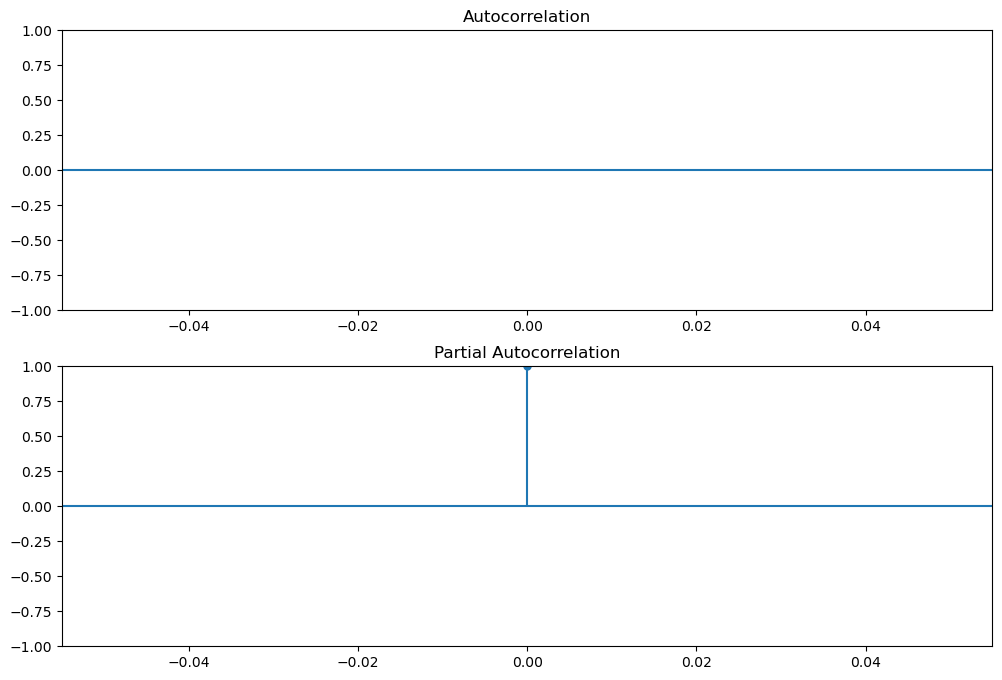

C:\Users\Megha Aggarwal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Megha Aggarwal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:       Stock Price(INR)   No. Observations:                   39
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -17.032
Date:                Fri, 01 Sep 2023   AIC                             40.064
Time:                        22:37:30   BIC                             44.977
Sample:                             0   HQIC                            41.812
                                 - 39                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3270      2.468     -0.133      0.895      -5.164       4.510
ma.L1          0.2653      2.598      0.102      0.919      -4.827       5.357
sigma2         0.1435      0.036      4.039      0.0

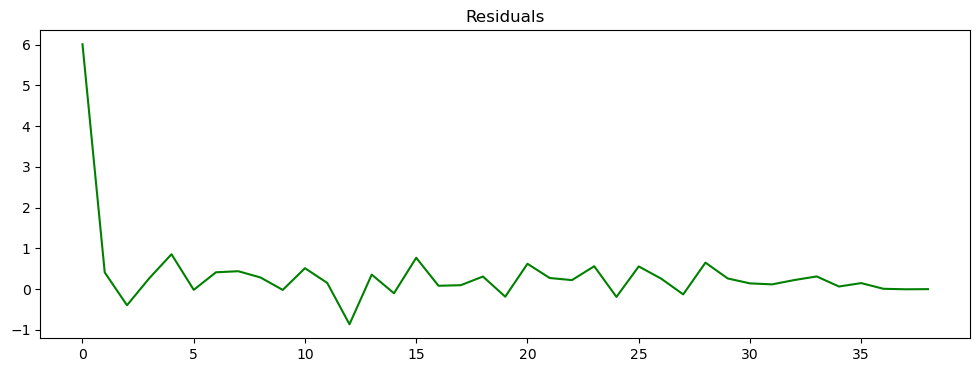

In [24]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Differencing (d=1)
df['diff_1'] = df['Stock Price(INR)'].diff(1)
df['diff_1'].dropna(inplace=True)

# Step 2: ACF and PACF plots
# ACF and PACF plots (limiting lags to 10)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['diff_1'], lags=20, ax=ax1)
plot_pacf(df['diff_1'], lags=10, ax=ax2)  # Reduce lags to a reasonable value
plt.show()

# Step 3: Fit an ARIMA model
# Based on the ACF and PACF plots, choose p and q values.
p = 1  # Example AR order
d = 1  # Differencing order (as we applied first-order differencing)
q = 1  # Example MA order

model = sm.tsa.ARIMA(df['Stock Price(INR)'], order=(p, d, q))
results = model.fit()

# Print model summary
print(results.summary())

# Plot residuals
residuals = results.resid
plt.figure(figsize=(12, 4))
plt.plot(residuals, label='Residuals', color='green')
plt.title('Residuals')
plt.show()


In [4]:
from statsmodels.tsa.stattools import adfuller

# ADF stationarity test on the differenced data
result = adfuller(df['diff_1'], autolag='AIC')

# Check the p-value from the test
p_value = result[1]
if p_value <= 0.05:
    print("Stationary: Reject the null hypothesis")
else:
    print("Non-Stationary: Fail to reject the null hypothesis")


Stationary: Reject the null hypothesis


C:\Users\Megha Aggarwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Megha Aggarwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Megha Aggarwal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Megha Aggarwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


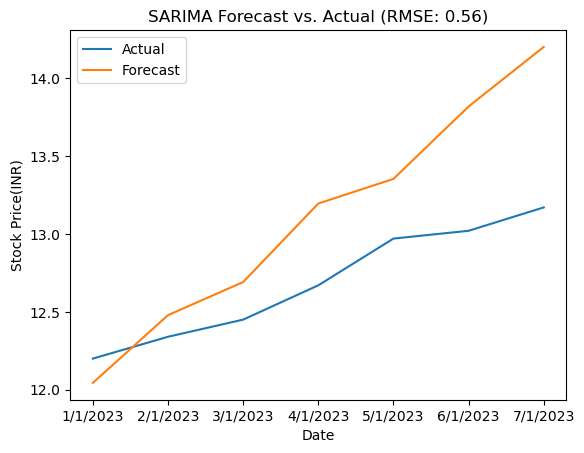

RMSE: 0.56


In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load your data and perform preprocessing

# Split data into training and testing sets
train_size = int(len(df) * 0.8)  # 80% training, 20% testing
train, test = df[:train_size], df[train_size:]

# Define SARIMA model order and seasonal order based on previous results
p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12

# Fit SARIMA model to the training data
sarima_model = sm.tsa.SARIMAX(
    train['Stock Price(INR)'],
    order=(p, d, q),
    seasonal_order=(P, D, Q, s),
    trend='c',  # 'c' for multiplicative seasonality, 't' for additive
)

results = sarima_model.fit()

# Make out-of-sample forecasts on the testing data
forecast = results.forecast(steps=len(test))

# Calculate RMSE as a forecast accuracy metric
rmse = mean_squared_error(test['Stock Price(INR)'], forecast, squared=False)

# Plot actual vs. forecast
plt.plot(test['Date'], test['Stock Price(INR)'], label='Actual')
plt.plot(test['Date'], forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price(INR)')
plt.title(f'SARIMA Forecast vs. Actual (RMSE: {rmse:.2f})')
plt.legend()
plt.show()

print(f"RMSE: {rmse:.2f}")


In [8]:
residuals = test['Stock Price(INR)'] - forecast


C:\Users\Megha Aggarwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Megha Aggarwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Megha Aggarwal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Megha Aggarwal\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use th

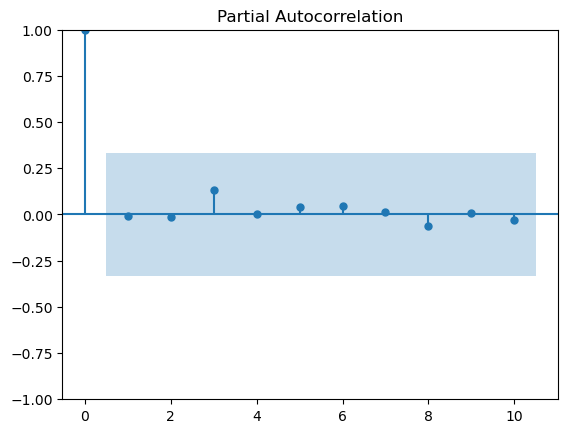

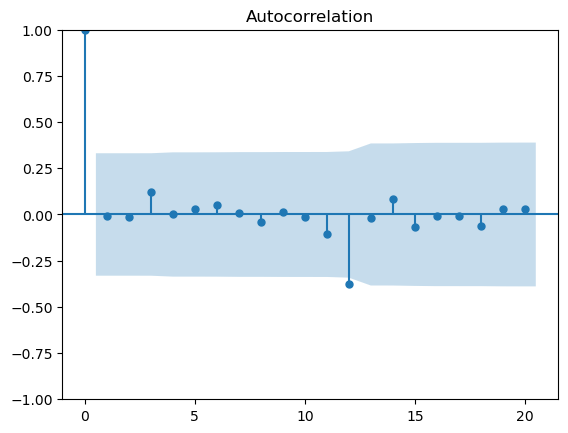

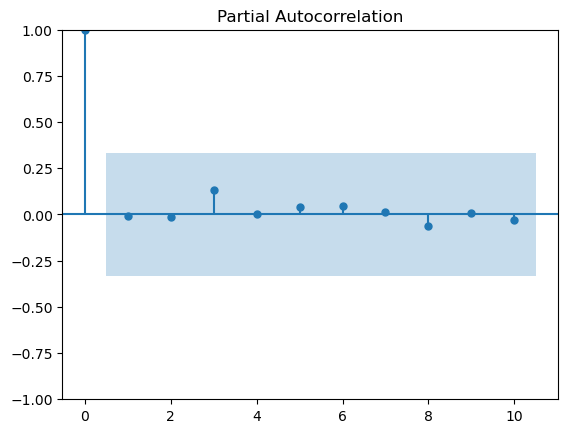

In [14]:
# Replace these values with your chosen SARIMA(p, d, q)(P, D, Q, s) orders
p, d, q, P, D, Q, s = (1, 1, 1, 1, 1, 1, 12)

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model = SARIMAX(df['Stock Price(INR)'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Now you can plot ACF and PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(results.resid, lags=20)
plot_pacf(results.resid, lags=10)  # Update the lags parameter to 10



C:\Users\Megha Aggarwal\AppData\Local\Temp\ipykernel_27944\4230870256.py:16: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = ExponentialSmoothing(train_data['Stock Price(INR)'], seasonal='add', seasonal_periods=12, trend='add', damped=True)
C:\Users\Megha Aggarwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


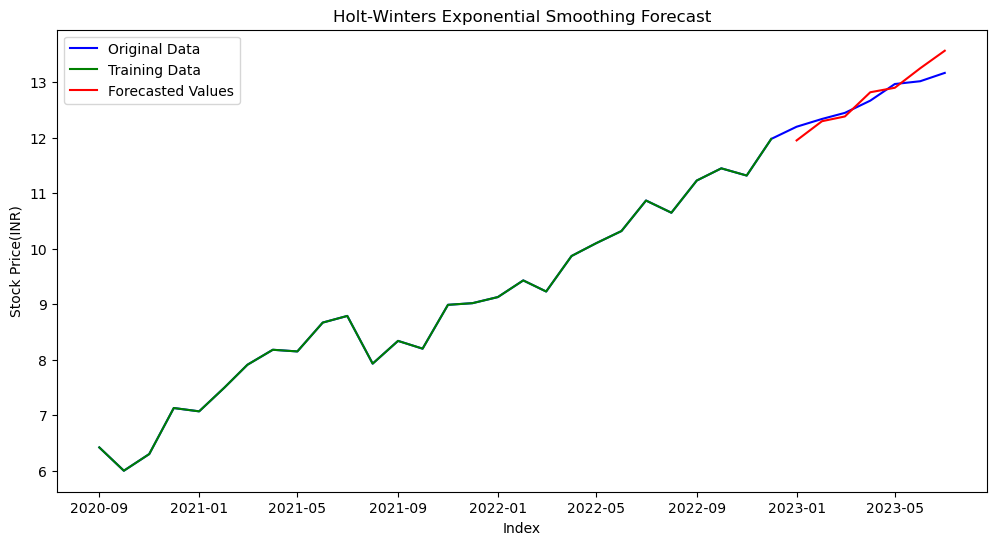

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your time series data into a DataFrame (assuming 'Date' and 'Stock Price(INR)' columns)
# Replace 'your_data.csv' with the actual file path or data source
# df = pd.read_csv('your_data.csv')

# Create a training dataset and a test dataset (split as needed)
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Fit Holt-Winters Exponential Smoothing to the training data
model = ExponentialSmoothing(train_data['Stock Price(INR)'], seasonal='add', seasonal_periods=12, trend='add', damped=True)
fit_model = model.fit()

# Forecast future values using the fitted model
forecast_values = fit_model.forecast(steps=len(test_data))

# Plot the original data, training data, and forecasted values using the DataFrame index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Stock Price(INR)'], label='Original Data', color='blue')
plt.plot(train_data.index, train_data['Stock Price(INR)'], label='Training Data', color='green')
plt.plot(test_data.index, forecast_values, label='Forecasted Values', color='red')
plt.xlabel('Index')
plt.ylabel('Stock Price(INR)')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing Forecast')
plt.show()


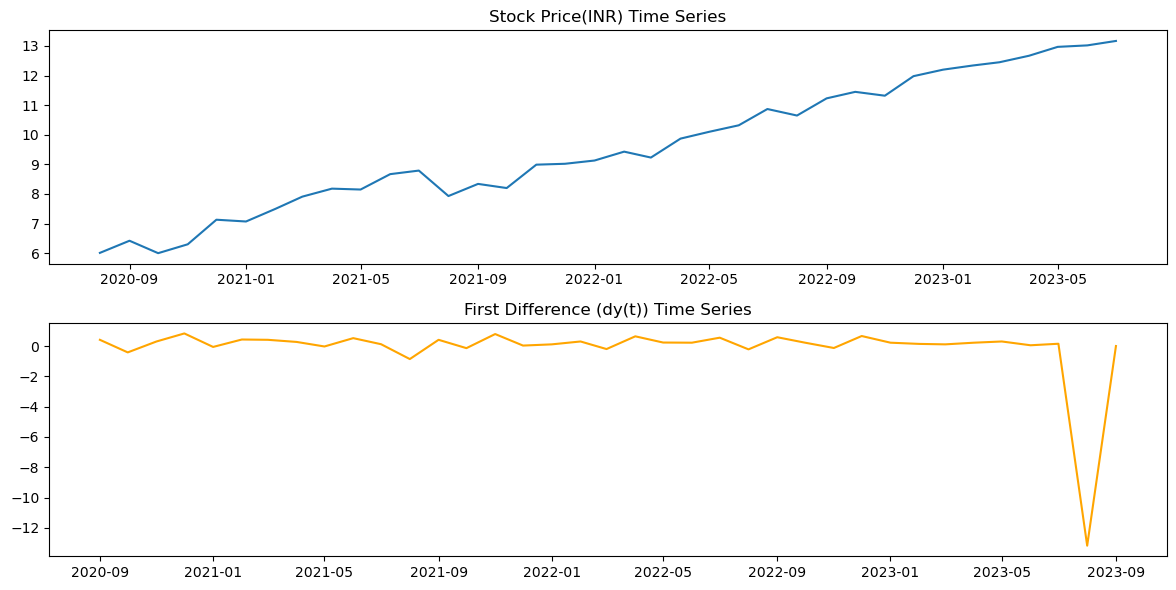

ADF Statistic: -5.942316441153281
p-value: 2.2458269722365239e-07
Critical Values:
1%: -3.626651907578875
5%: -2.9459512825788754
10%: -2.6116707716049383
ARIMA(0, 1, 0) - AIC: 36.399080237551445
ARIMA(0, 1, 1) - AIC: 38.37837473654142
ARIMA(0, 1, 2) - AIC: 36.71614388447164
ARIMA(0, 1, 3) - AIC: 36.756837028882586
ARIMA(0, 1, 4) - AIC: 37.96362208038076
ARIMA(0, 1, 5) - AIC: 36.083614487800034
ARIMA(1, 1, 0) - AIC: 38.36770240216338
ARIMA(1, 1, 1) - AIC: 40.25300431682169
ARIMA(1, 1, 2) - AIC: 29.42578953044438
ARIMA(1, 1, 3) - AIC: 31.385588763204098
ARIMA(1, 1, 4) - AIC: 33.303860681151306
ARIMA(1, 1, 5) - AIC: 35.542446285761386
ARIMA(2, 1, 0) - AIC: 38.11432796525943
ARIMA(2, 1, 1) - AIC: 30.19761111880604
ARIMA(2, 1, 2) - AIC: 31.39678594502163
ARIMA(2, 1, 3) - AIC: 31.70589811928607
ARIMA(2, 1, 4) - AIC: 33.231896038461215
ARIMA(2, 1, 5) - AIC: 33.550128522457314
ARIMA(3, 1, 0) - AIC: 33.41172805753039
ARIMA(3, 1, 1) - AIC: 30.968446119275402
ARIMA(3, 1, 2) - AIC: 30.00673480147

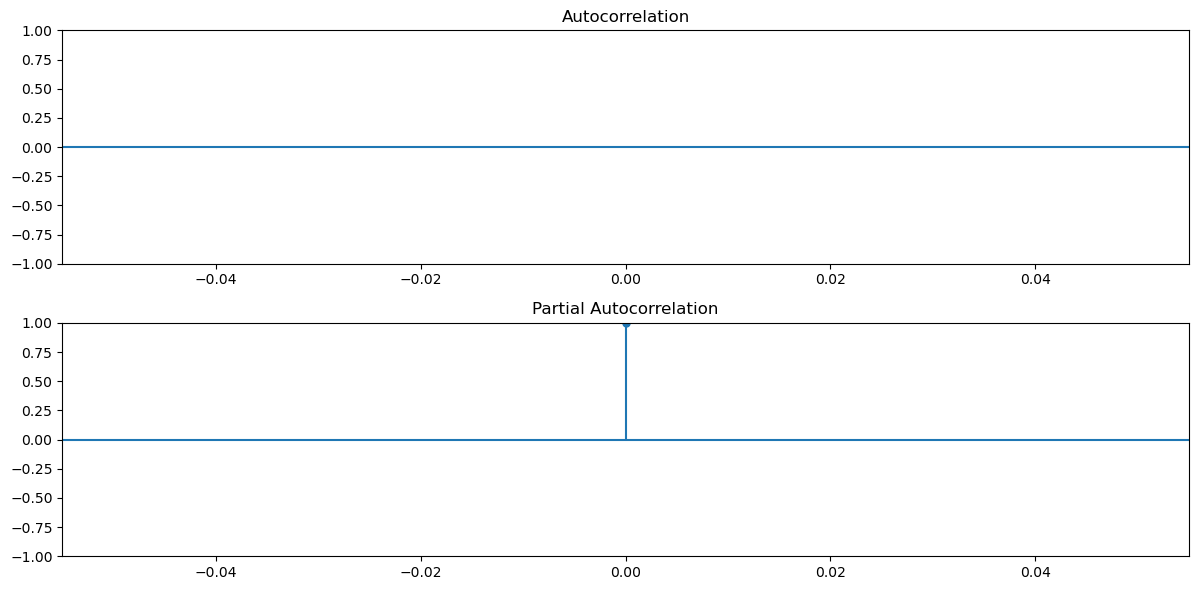

Ljung-Box Test p-values:
    lb_stat  lb_pvalue
10      NaN        NaN


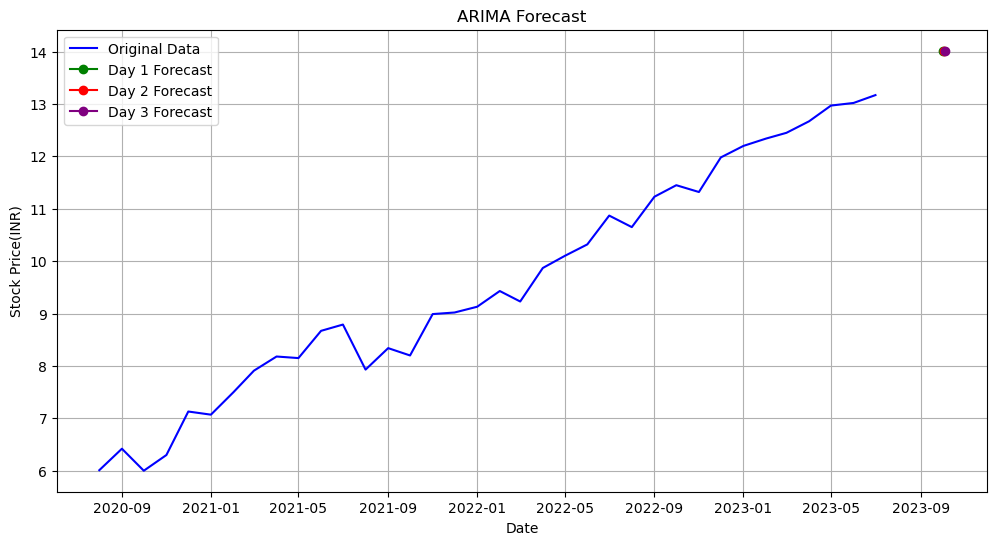

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


# Load the dataset
data = pd.read_csv("CCE.csv") 

# Set the 'Date' column as the index and convert it to a datetime type
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

import warnings
warnings.filterwarnings("ignore")

# Plot the Stock Price(INR) and dy(t) time series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Stock Price(INR)'], label='Stock Price(INR)')
plt.title('Stock Price(INR) Time Series')
plt.subplot(2, 1, 2)
plt.plot(data['dy(t)'], label='dy(t)', color='orange')
plt.title('First Difference (dy(t)) Time Series')
plt.tight_layout()
plt.show()

# Check for stationarity of the 'dy(t)' time series
result = adfuller(data['dy(t)'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"{key}: {value}")

# search for best grid
best_aic = np.inf
best_p = 0
best_q = 0

for p in range(6):  # You can adjust the range as needed
    for q in range(6):  # You can adjust the range as needed
        try:
            model = ARIMA(data['Stock Price(INR)'], order=(p, 1, q))
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_p = p
                best_q = q
            print(f"ARIMA({p}, 1, {q}) - AIC: {aic}")
        except:
            continue

print(f"Best ARIMA Order (p, d, q): ({best_p}, 1, {best_q})")
print(f"Best AIC: {best_aic}")

# Fit the ARIMA Model
model = ARIMA(data['Stock Price(INR)'], order=(best_p, 1, best_q))
results = model.fit()

# Evaluate Model Fit
residuals = results.resid

# Plot ACF and PACF of residuals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(residuals, lags=10, ax=plt.gca())
plt.subplot(2, 1, 2)
plot_pacf(residuals, lags=10, ax=plt.gca())

plt.tight_layout()
plt.show()

# Ljung-Box test for white noise
lb_test = sm.stats.acorr_ljungbox(results.resid, lags=[10], return_df=True)
print("Ljung-Box Test p-values:")
print(lb_test)

# Forecasting for the next three days
forecast_steps = 3
forecast_values, stderr, conf_int = results.forecast(steps=forecast_steps)

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(data['Stock Price(INR)'], label='Original Data', color='blue')
plt.plot(data.index[-1] + pd.DateOffset(days=1), forecast_values, marker='o', color='green', label='Day 1 Forecast')
plt.plot(data.index[-1] + pd.DateOffset(days=2), forecast_values, marker='o', color='red', label='Day 2 Forecast')
plt.plot(data.index[-1] + pd.DateOffset(days=3), forecast_values, marker='o', color='purple', label='Day 3 Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price(INR)')
plt.legend()
plt.title('ARIMA Forecast')
plt.grid(True)
plt.show()


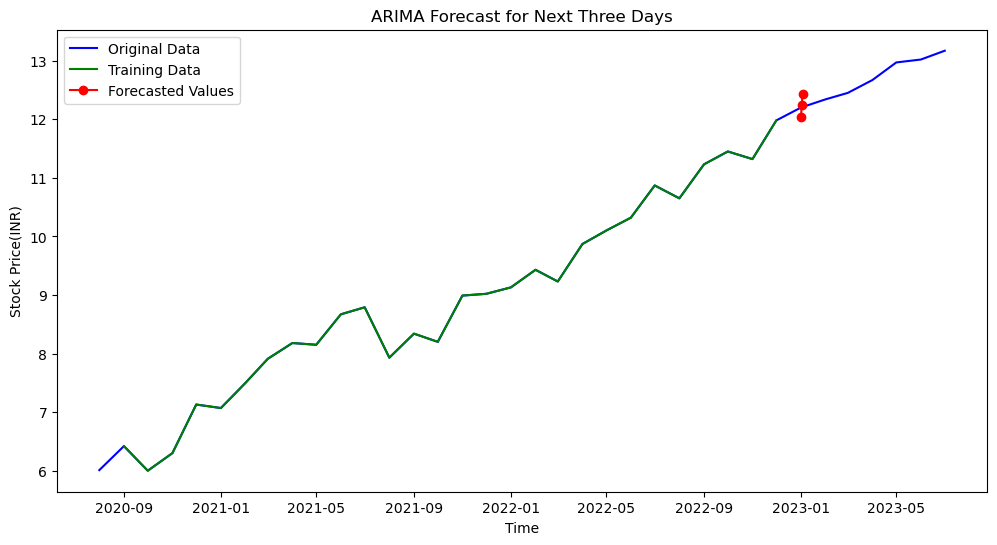

In [39]:
# Fit ARIMA model with the best order (1,1,2)
best_order = (1, 1, 2)
model = ARIMA(train_data['Stock Price(INR)'], order=best_order)
model_fit = model.fit()

# Forecast the next three days
forecast_values = model_fit.forecast(steps=3)

# Plot the original data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Stock Price(INR)'], label='Original Data', color='blue')
plt.plot(train_data.index, train_data['Stock Price(INR)'], label='Training Data', color='green')

# Create x-values for the forecasted values
forecast_dates = pd.date_range(start=test_data.index[0], periods=len(forecast_values), freq='D')

plt.plot(forecast_dates, forecast_values, marker='o', color='red', label='Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Stock Price(INR)')
plt.legend()
plt.title('ARIMA Forecast for Next Three Days')
plt.show()



### The graph shows the following components:

Original Data (Blue Line): This represents the historical stock prices up to the present.

Fitted Values (Green Line): These are the model's predictions for the historical data, which closely follow the observed values.

Forecasted Values (Red Dots): These are the predicted stock prices for the next three days. Each red dot corresponds to the forecasted value for one day.

From the graph, we can observe that the fitted values (green line) closely follow the historical data, indicating that the ARIMA(1,1,2) model captures the underlying patterns in the data. Additionally, the forecasted values (red dots) extend into the future, providing predictions for the stock prices for the next three days.